# Bivariate plotting with pandas

<table>
<tr>
<td><img src="https://i.imgur.com/bBj1G1v.png" width="350px"/></td>
<td><img src="https://i.imgur.com/ChK9zR3.png" width="350px"/></td>
<td><img src="https://i.imgur.com/KBloVHe.png" width="350px"/></td>
<td><img src="https://i.imgur.com/C7kEWq7.png" width="350px"/></td>
</tr>
<tr>
<td style="font-weight:bold; font-size:16px;">Scatter Plot</td>
<td style="font-weight:bold; font-size:16px;">Hex Plot</td>
<td style="font-weight:bold; font-size:16px;">Stacked Bar Chart</td>
<td style="font-weight:bold; font-size:16px;">Bivariate Line Chart</td>
</tr>
<tr>
<td>df.plot.scatter()</td>
<td>df.plot.hex()</td>
<td>df.plot.bar(stacked=True)</td>
<td>df.plot.line()</td>
</tr>
<tr>
<td>Good for interval and some nominal categorical data.</td>
<td>Good for interval and some nominal categorical data.</td>
<td>Good for nominal and ordinal categorical data.</td>
<td>Good for ordinal categorical and interval data.</td>
</tr>
</table>

In the previous notebook, we explored using `pandas` to plot and understand relationships within a single column. In this notebook, we'll expand this view by looking at plots that consider two variables at a time.

Data without relationships between variables is the data science equivalent of a blank canvas. To paint the picture in, we need to understand how variables interact with one another. Does an increase in one variable correlate with an increase in another? Does it relate to a decrease somewhere else? The best way to paint the picture in is by using plots that enable these possibilities.

In [ ]:
import pandas as pd
reviews = pd.read_csv("../input/wine-reviews/winemag-data_first150k.csv", index_col=0)
reviews.head()

## Scatter plot

The simplest bivariate plot is the lowly **scatter plot**. A simple scatter plot simply maps each variable of interest to a point in two-dimensional space. This is the result:

In [ ]:
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')

Note that in order to make effective use of this plot, we had to **downsample** our data, taking just 100 points from the full set. This is because naive scatter plots do not effectively treat points which map to the same place.

For example, if two wines, both costing 100 dollars, get a rating of 90, then the second one is overplotted onto the first one, and we add just one point to the plot.

This isn't a problem if it happens just a few times. But with enough points the distribution starts to look like a shapeless blob, and you lose the forest for the trees:

In [ ]:
reviews[reviews['price'] < 100].plot.scatter(x='price', y='points')

There are a few ways to treat this problem. We've already demonstrated one way: sampling the points. Another interesting way to do this that's built right into `pandas` is to use our next plot type, a hexplot.

## Hexplot

A  hexplot aggregates points in space into hexagons, and then colorize those hexagons:

In [ ]:
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)

The data in this plot is directly comprable to the scatter plot from earlier, but the story it tells us is very different. The hexplot provides us with a much more useful view on the dataset, showing that the bottles of wine reviewed by Wine Magazine cluster around 87.5 points and around $20.

Hexplots and scatter plots can by applied to combinations of interval variables or ordinal categorical variables. To help aleviate overplotting, scatter plots (and, to a lesser extent, hexplots) benefit from variables which can take on a wide range of unique values.

## Stacked plots

Scatter plots and hex plots are new. But we can also use the simpler plots we saw in the last notebook.

The easiest way to modify them to support another visual variable is by using stacking. A stacked chart is one which plots the variables one on top of the other.

We'll use a supplemental selection of the five most common wines for this next section.

In [ ]:
wine_counts = pd.read_csv("../input/most-common-wine-scores/top-five-wine-score-counts.csv",
                          index_col=0)

`wine_counts` counts the number of times each of the possible review scores was received by the five most commonly reviewed types of wines:

In [ ]:
wine_counts.head()

Many `pandas` multivariate plots expect input data to be in this format, with one categorical variable in the columns, one categorical variable in the rows, and counts of their intersections in the entries. 

Let's now look at some stacked plots. We'll start with the stacked bar chart.

In [ ]:
wine_counts.plot.bar(stacked=True)

Stacked bar plots share the strengths and weaknesses of univariate bar charts. They work best for nominal categorical or small ordinal categorical variables.

Another simple example is the area plot, which lends itself very naturally to this form of manipulation:

In [ ]:
wine_counts.plot.area()

Like single-variable area charts, multivariate area charts are meant for nominal categorical or interval variables.

Stacked plots are visually very pretty. However, they suffer from two major problems.

The first limitation is that the second variable in a stacked plot must be a variable with a very limited number of possible values (probably an ordinal categorical, as here). Five different types of wine is a good number because it keeps the result interpretable; eight is sometimes mentioned as a suggested upper bound. Many dataset fields will not fit this critereon naturally, so you will have to "make do", as here, by selecting a group of interest.

The second limitation is one of interpretability. As easy as they are to make, and as pretty as they look, stacked plots are really hard to distinguish values within. For example, looking at the plot above, can you tell which wine is the most common one to have gotten a score of approximately 87: the purple, the red, or the green? It's actually really hard to tell!

## Bivariate line chart

One plot type we've seen already that remains highly effective when made bivariate is the line chart. Because the line in this chart takes up so little visual space, it's really easy and effective to overplot multiple lines on the same chart.

In [ ]:
wine_counts.plot.line()

Using a line chart this way makes inroads against the second limitation of stacked plotting. Bivariate line charts are much more interpretable: we can see in this chart fairly easily that the green wine (the Chardonnay) very slightly edges out the Pinot Noir around the 87-point scoreline.

## Exercises

In this section we introduced and explored some common bivariate plot types:

* Scatter plots
* Hex plots
* Stacked bar charts and area charts
* Bivariate line charts

Let's now put what we've learned to the test!

Try answering the following questions:

1. A scatter plot or hex plot is good for what two types of data?
2. What type of data makes sense to show in a stacked bar chart, but not in a bivariate line chart?
3. What type of data makes sense to show in a bivariate line chart, but not in a stacked bar chart?
4. Suppose we create a scatter plot but find that due to the large number of points it's hard to interpret. What are two things we can do to fix this issue?

To see the answers, click the "Output" button on the cell below.

In [ ]:
from IPython.display import HTML
HTML("""
<ol>
<li>Scatter plots and hex plots work best with a mixture of ordinal categorical and interval data.</li>
<br/>
<li>Nominal categorical data makes sense in a (stacked) bar chart, but not in a (bivariate) line chart.</li>
<br/>
<li>Interval data makes sense in a bivariate line chart, but not in a stacked bar chart.</li>
<br/>
<li>One way to fix this issue would be to sample the points. Another way to fix it would be to use a hex plot.</li>
</ol>
""")

Next, let's replicate some plots. Recall the Pokemon dataset from earlier:

In [2]:
import pandas as pd
pokemon = pd.read_csv("../input/pokemon/Pokemon.csv", index_col=0)
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


For the exercises that follow, try forking this notebook and replicating the plots that follow. To see the answers, hit the "Input" button below to un-hide the code.

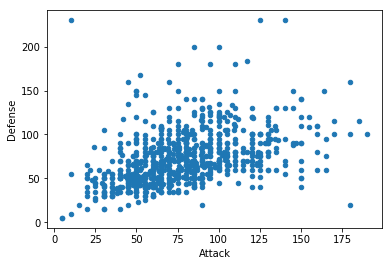

In [4]:
pokemon.plot.scatter(x='Attack', y='Defense')

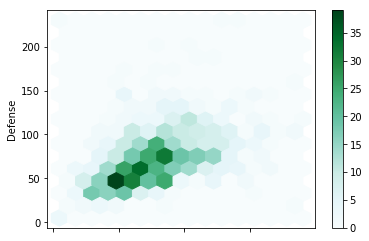

In [5]:
pokemon.plot.hexbin(x='Attack', y='Defense',gridsize=15)

For thee next plot, use the following data:

In [8]:
pokemon_stats_legendary = pokemon.groupby(['Legendary', 'Generation']).mean()[['Attack', 'Defense']]
pokemon_stats_legendary

Attack     Defense
Legendary Generation                        
False     1            74.981250   70.175000
          2            70.693069   72.118812
          3            76.971831   69.901408
          4            79.620370   75.074074
          5            78.246667   70.486667
          6            70.459459   74.013514
True      1           120.833333   89.166667
          2            99.000000   99.000000
          3           118.333333  107.222222
          4           109.846154  103.538462
          5           120.266667   90.733333
          6           125.250000  101.375000

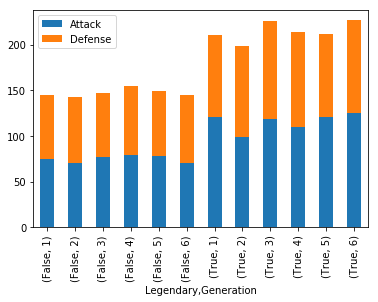

In [11]:
pokemon_stats_legendary.plot.bar(stacked=True)

For the next plot, use the following data:

In [13]:
pokemon_stats_by_generation = pokemon.groupby('Generation').mean()[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
pokemon_stats_by_generation


,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Generation,,,,,,
1,65.819277,76.638554,70.861446,71.819277,69.090361,72.584337
2,71.207547,72.028302,73.386792,65.943396,73.905660,61.811321
3,66.543750,81.625000,74.100000,75.806250,71.225000,66.925000
4,73.082645,82.867769,78.132231,76.404959,77.190083,71.338843
5,71.787879,82.066667,72.327273,71.987879,68.739394,68.078788
6,68.268293,75.804878,76.682927,74.292683,74.890244,66.439024


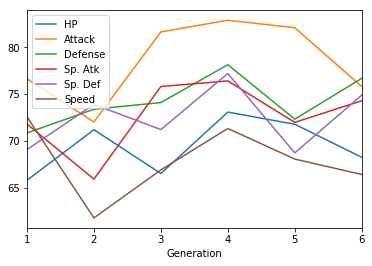

In [14]:
pokemon_stats_by_generation.plot.line()

## Conclusion

In this section we introduced and explored some common bivariate plot types:

* Scatter plots
* Hex plots
* Stacked bar charts and area charts
* Bivariate line charts

In the next section we will move on to exploring another plotting library, `seaborn`, which compliments `pandas` with many more advanced data visualization tools for you to use.

[Click here to move on to the next section, "Plotting with seaborn"](https://www.kaggle.com/residentmario/plotting-with-seaborn/).